In [56]:
import pickle
import time
from numbers import Number

import pytket
from pytket._tket.architecture import Architecture
from pytket._tket.passes import SequencePass, PlacementPass, RoutingPass
from pytket._tket.placement import GraphPlacement
from pytket._tket.predicates import CompilationUnit
from pytket._tket.transform import Transform, PauliSynthStrat, CXConfigType
from pytket.extensions.qiskit import qiskit_to_tk, tk_to_qiskit
from pytket.utils import gen_term_sequence_circuit, QubitPauliOperator
from pyzx import Mat2
from qiskit import QuantumCircuit
from sympy.core.symbol import Symbol

from pauliopt.pauli.pauli_gadget import PPhase
from pauliopt.pauli.pauli_polynomial import *
from pauliopt.pauli.clifford_gates import V, CX
from pauliopt.pauli.synthesis import PauliSynthesizer, SynthMethod
from pauliopt.utils import pi, AngleVar, π

In [19]:
def operator_to_pp(operator, n_qubits):
    qps_list = list(operator._dict.keys())
    pp = PauliPolynomial(n_qubits)
    idx = 0
    for qps in qps_list:
        coeff = operator[qps]
        qps_map = qps.map
        if qps_map:
            paulis = [I for _ in range(n_qubits)]
            for qb, pauli in qps_map.items():
                if pauli == 0:
                    continue
                elif pauli == 1:
                    paulis[qb.index[0]] = X
                elif pauli == 2:
                    paulis[qb.index[0]] = Y
                elif pauli == 3:
                    paulis[qb.index[0]] = Z
            pp >>= PPhase(AngleVar(f"\alpha_{idx}")) @ paulis
            idx += 1
        # idx += 1
    return pp

In [20]:
# H2_BK_sto3g
# H2_P_631g
with open("tket_benchmarking/compilation_strategy/operators/P_operators/H2_P_sto3g.pickle", "rb") as pickle_in:
    qubit_pauli_operator = pickle.load(pickle_in)

n_qubits = 2
topo = Topology.complete(n_qubits)

pp = operator_to_pp(qubit_pauli_operator, n_qubits)
pp

In [21]:
print(pp.to_latex())

\documentclass[preview]{standalone}

\usepackage{tikz}
\usetikzlibrary{zx-calculus}
\usetikzlibrary{quantikz}
\usepackage{graphicx}

\tikzset{
diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.south west) -|
                         (path picture bounding box.north east) -- cycle;}},
reversed diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.north west) |- 
                         (path picture bounding box.south east) -- cycle;}}
}

\tikzset{
diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.south west) -|
                         (path picture bounding box.north east) -- cycle;}}
}

\tikzset{
pauliY/.style={
zxAllNodes,
zxSpiders,
inner sep=0mm,
minimum size=2mm,
shape=rectangle,
%fill=colorZxX
diagonal fill={colorZxX}{colorZxZ}
}
}

\tikzset{
pauliX/.style={
zxAllNodes,
zxSpiders,
inner sep=0mm,
minimum size=2mm,
shape=

In [23]:
circ = pp.to_qiskit()
circ = qiskit_to_tk(circ)

circ.to_latex_file("test.tex")

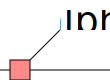

In [25]:
pp = PauliPolynomial(1)
pp >>= PPhase(AngleVar(f"\\alpha")) @ [Z]
pp

In [27]:
print(pp.to_latex())

\documentclass[preview]{standalone}

\usepackage{tikz}
\usetikzlibrary{zx-calculus}
\usetikzlibrary{quantikz}
\usepackage{graphicx}

\tikzset{
diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.south west) -|
                         (path picture bounding box.north east) -- cycle;}},
reversed diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.north west) |- 
                         (path picture bounding box.south east) -- cycle;}}
}

\tikzset{
diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.south west) -|
                         (path picture bounding box.north east) -- cycle;}}
}

\tikzset{
pauliY/.style={
zxAllNodes,
zxSpiders,
inner sep=0mm,
minimum size=2mm,
shape=rectangle,
%fill=colorZxX
diagonal fill={colorZxX}{colorZxZ}
}
}

\tikzset{
pauliX/.style={
zxAllNodes,
zxSpiders,
inner sep=0mm,
minimum size=2mm,
shape=

In [34]:
pp = PauliPolynomial(3)
pp >>= PPhase(AngleVar(f"\\alpha")) @ [X, Y, Z]
pp >>= PPhase(AngleVar(f"\\beta")) @ [Y, Z, X]

print(pp.to_latex())

\documentclass[preview]{standalone}

\usepackage{tikz}
\usetikzlibrary{zx-calculus}
\usetikzlibrary{quantikz}
\usepackage{graphicx}

\tikzset{
diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.south west) -|
                         (path picture bounding box.north east) -- cycle;}},
reversed diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.north west) |- 
                         (path picture bounding box.south east) -- cycle;}}
}

\tikzset{
diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.south west) -|
                         (path picture bounding box.north east) -- cycle;}}
}

\tikzset{
pauliY/.style={
zxAllNodes,
zxSpiders,
inner sep=0mm,
minimum size=2mm,
shape=rectangle,
%fill=colorZxX
diagonal fill={colorZxX}{colorZxZ}
}
}

\tikzset{
pauliX/.style={
zxAllNodes,
zxSpiders,
inner sep=0mm,
minimum size=2mm,
shape=

In [35]:
pp = PauliPolynomial(3)
pp >>= PPhase(AngleVar(f"\\beta")) @ [Y, Z, X]
pp >>= PPhase(AngleVar(f"\\alpha")) @ [X, Y, Z]

print(pp.to_latex())

\documentclass[preview]{standalone}

\usepackage{tikz}
\usetikzlibrary{zx-calculus}
\usetikzlibrary{quantikz}
\usepackage{graphicx}

\tikzset{
diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.south west) -|
                         (path picture bounding box.north east) -- cycle;}},
reversed diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.north west) |- 
                         (path picture bounding box.south east) -- cycle;}}
}

\tikzset{
diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.south west) -|
                         (path picture bounding box.north east) -- cycle;}}
}

\tikzset{
pauliY/.style={
zxAllNodes,
zxSpiders,
inner sep=0mm,
minimum size=2mm,
shape=rectangle,
%fill=colorZxX
diagonal fill={colorZxX}{colorZxZ}
}
}

\tikzset{
pauliX/.style={
zxAllNodes,
zxSpiders,
inner sep=0mm,
minimum size=2mm,
shape=

In [36]:
pp = PauliPolynomial(3)
pp >>= PPhase(AngleVar(f"\\alpha")) @ [Y, Z, X]
pp >>= PPhase(AngleVar(f"\\beta")) @ [X, Z, X]

print(pp.to_latex())

\documentclass[preview]{standalone}

\usepackage{tikz}
\usetikzlibrary{zx-calculus}
\usetikzlibrary{quantikz}
\usepackage{graphicx}

\tikzset{
diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.south west) -|
                         (path picture bounding box.north east) -- cycle;}},
reversed diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.north west) |- 
                         (path picture bounding box.south east) -- cycle;}}
}

\tikzset{
diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.south west) -|
                         (path picture bounding box.north east) -- cycle;}}
}

\tikzset{
pauliY/.style={
zxAllNodes,
zxSpiders,
inner sep=0mm,
minimum size=2mm,
shape=rectangle,
%fill=colorZxX
diagonal fill={colorZxX}{colorZxZ}
}
}

\tikzset{
pauliX/.style={
zxAllNodes,
zxSpiders,
inner sep=0mm,
minimum size=2mm,
shape=

In [37]:
pp = PauliPolynomial(3)
pp >>= PPhase(AngleVar(f"\\beta")) @ [X, Z, X]
pp >>= PPhase(AngleVar(f"\\alpha")) @ [Y, Z, X]

print(pp.to_latex())

\documentclass[preview]{standalone}

\usepackage{tikz}
\usetikzlibrary{zx-calculus}
\usetikzlibrary{quantikz}
\usepackage{graphicx}

\tikzset{
diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.south west) -|
                         (path picture bounding box.north east) -- cycle;}},
reversed diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.north west) |- 
                         (path picture bounding box.south east) -- cycle;}}
}

\tikzset{
diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.south west) -|
                         (path picture bounding box.north east) -- cycle;}}
}

\tikzset{
pauliY/.style={
zxAllNodes,
zxSpiders,
inner sep=0mm,
minimum size=2mm,
shape=rectangle,
%fill=colorZxX
diagonal fill={colorZxX}{colorZxZ}
}
}

\tikzset{
pauliX/.style={
zxAllNodes,
zxSpiders,
inner sep=0mm,
minimum size=2mm,
shape=

In [62]:
from pauliopt.pauli.synth.uccds import find_compatible_pair

In [80]:
pp = PauliPolynomial(2)
pp >>= PPhase(Angle(pi/2)) @ [I, Y]
pp >>= PPhase(Angle(pi/2)) @ [X, Z]
pp >>= PPhase(Angle(pi/2)) @ [Y, Y]
pp >>= PPhase(Angle(pi/2)) @ [Z, Z]
pp >>= PPhase(Angle(pi/2)) @ [Z, X]


print(pp)
print(find_compatible_pair(pp, 0, 1))

PPhase(π/2) @  [ I, Y ]
PPhase(π/2) @  [ X, Z ]
PPhase(π/2) @  [ Y, Y ]
PPhase(π/2) @  [ Z, Z ]
PPhase(π/2) @  [ Z, X ]
(<Pauli.Y: 'Y'>, <Pauli.Y: 'Y'>)


In [81]:
pp.propagate(V(1))
pp.propagate(V(0))
#pp.propagate(CX(0, 1))
print(pp)

PPhase(3π/2) @  [ I, Z ]
PPhase(π/2) @   [ X, Y ]
PPhase(π/2) @   [ Z, Z ]
PPhase(π/2) @   [ Y, Y ]
PPhase(π/2) @   [ Y, X ]


In [103]:
pp = PauliPolynomial(4)

pp >>= PPhase(AngleVar(f"\\alpha_0")) @ [Z, Z, Z, I]
pp >>= PPhase(AngleVar(f"\\alpha_1")) @ [Z, I, I, Z]
pp >>= PPhase(AngleVar(f"\\alpha_2")) @ [I, I, I, Z]
pp >>= PPhase(AngleVar(f"\\alpha_3")) @ [Z, Z, I, I]
pp >>= PPhase(AngleVar(f"\\alpha_4")) @ [Z, I, Z, Z]


print(pp.to_latex())

\documentclass[preview]{standalone}

\usepackage{tikz}
\usetikzlibrary{zx-calculus}
\usetikzlibrary{quantikz}
\usepackage{graphicx}

\tikzset{
diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.south west) -|
                         (path picture bounding box.north east) -- cycle;}},
reversed diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.north west) |- 
                         (path picture bounding box.south east) -- cycle;}}
}

\tikzset{
diagonal fill/.style 2 args={fill=#2, path picture={
\fill[#1, sharp corners] (path picture bounding box.south west) -|
                         (path picture bounding box.north east) -- cycle;}}
}

\tikzset{
pauliY/.style={
zxAllNodes,
zxSpiders,
inner sep=0mm,
minimum size=2mm,
shape=rectangle,
%fill=colorZxX
diagonal fill={colorZxX}{colorZxZ}
}
}

\tikzset{
pauliX/.style={
zxAllNodes,
zxSpiders,
inner sep=0mm,
minimum size=2mm,
shape=

In [91]:
Topology.grid(2, 2).to_nx.edges()

EdgeView([(0, 1), (0, 2), (1, 3), (2, 3)])